Data Incubator Project

Download Data

In [130]:
!pip install wget

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import wget
filename = wget.download('https://data.baltimorecity.gov/api/views/n4ma-fj3m/rows.csv')

In [4]:
import pandas as pd
df = pd.read_csv('Parking_Citations.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
len(df)

3374648

In [6]:
df.columns

Index(['Citation', 'Tag', 'ExpMM', 'ExpYY', 'State', 'Make', 'Address',
       'ViolCode', 'Description', 'ViolFine', 'ViolDate', 'Balance',
       'PenaltyDate', 'OpenFine', 'OpenPenalty', 'NoticeDate', 'ImportDate',
       'Neighborhood', 'PoliceDistrict', 'CouncilDistrict', 'Location'],
      dtype='object')

In [7]:
df.dtypes

Citation             int64
Tag                 object
ExpMM               object
ExpYY              float64
State               object
Make                object
Address             object
ViolCode             int64
Description         object
ViolFine           float64
ViolDate            object
Balance            float64
PenaltyDate        float64
OpenFine           float64
OpenPenalty        float64
NoticeDate          object
ImportDate          object
Neighborhood        object
PoliceDistrict      object
CouncilDistrict    float64
Location            object
dtype: object

Unless stated otherwise, you should only consider citations written before January 1, 2019. 

In [56]:
df['DateTime'] = pd.to_datetime(df['ViolDate'])

In [59]:
df2.to_csv('parking_citations3.csv')

In [57]:
import datetime
df2=df[(df['DateTime']<datetime.date(2019,1,1))]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


In [2]:
len(df2)

2840515

In [1]:
import pandas as pd
df2 = pd.read_csv('parking_citations3.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


For all citations, what is the mean violation fine? 

In [3]:
df2.ViolFine.mean()

49.16334749156403

In [4]:
df2.PoliceDistrict.value_counts()

Southeastern    57963
Central         53621
Southern        50461
Northern        39428
Notheastern     22539
Eastern         19619
Western         16705
Southwestern    14360
Northwestern    11757
SOUTHEASTERN     8600
SOUTHERN         7083
CENTRAL          6437
NORTHERN         5419
NORTHEASTERN     1865
EASTERN          1489
SOUTHWESTERN     1150
WESTERN          1137
NORTHWESTERN      728
Name: PoliceDistrict, dtype: int64

In [5]:
df2['PoliceDistrict'].replace(['Central'], 'CENTRAL', inplace = True)
df2['PoliceDistrict'].replace(['Eastern'], 'EASTERN', inplace = True)
df2['PoliceDistrict'].replace(['Northern'], 'NORTHERN', inplace = True)
df2['PoliceDistrict'].replace(['Northwestern'], 'NORTHWESTERN', inplace = True)
df2['PoliceDistrict'].replace(['Northeastern'], 'NORTHEASTERN', inplace = True)
df2['PoliceDistrict'].replace(['Notheastern'], 'NORTHEASTERN', inplace = True)
df2['PoliceDistrict'].replace(['Southeastern'], 'SOUTHEASTERN', inplace = True)
df2['PoliceDistrict'].replace(['Southern'], 'SOUTHERN', inplace = True)
df2['PoliceDistrict'].replace(['Southwestern'], 'SOUTHWESTERN', inplace = True)
df2['PoliceDistrict'].replace(['Western'], 'WESTERN', inplace = True)

In [6]:
df2.PoliceDistrict.value_counts()

SOUTHEASTERN    66563
CENTRAL         60058
SOUTHERN        57544
NORTHERN        44847
NORTHEASTERN    24404
EASTERN         21108
WESTERN         17842
SOUTHWESTERN    15510
NORTHWESTERN    12485
Name: PoliceDistrict, dtype: int64

In [7]:
df2.groupby('PoliceDistrict')['ViolFine'].mean().max()

60.9117357810195

In [8]:
%matplotlib inline

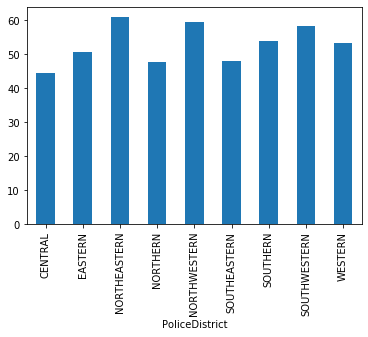

In [9]:
df2.groupby('PoliceDistrict')['ViolFine'].mean().plot.bar()

In [10]:
df2.groupby('PoliceDistrict')['ViolFine'].mean()

PoliceDistrict
CENTRAL         44.607646
EASTERN         50.597735
NORTHEASTERN    60.911736
NORTHERN        47.774968
NORTHWESTERN    59.569724
SOUTHEASTERN    48.011072
SOUTHERN        53.766353
SOUTHWESTERN    58.415216
WESTERN         53.328439
Name: ViolFine, dtype: float64

In [11]:
cond = df2.OpenPenalty != 0

In [12]:
vop = df2[cond]

In [13]:
vop.OpenPenalty.describe(percentiles = [0.25, 0.50, 0.81])

count    209371.000000
mean        285.050083
std         182.946846
min           1.000000
25%         144.000000
50%         300.000000
81%         480.000000
max        3120.000000
Name: OpenPenalty, dtype: float64

In [14]:
vop.OpenPenalty.quantile(0.81) # 81st percentile

480.0

Find the ten vehicle makes that received the most citations during 2017. For those top ten, find all Japanese-made vehicles. What proportion of all citations were written for those vehicles? Note that the naming in Make is not consistent over the whole dataset, so you will need to clean the data before calculating your answer. Your answer should be expressed as a decimal number (i.e. 0.42, not 42). 

In [15]:
tvm = df2.Make.value_counts().sort_values( ascending=False)

In [16]:
len(tvm)

1556

In [17]:
type(tvm)

pandas.core.series.Series

In [18]:
tvm

FORD     312261
HONDA    182650
TOYOT    174334
HOND     148290
TOYT     144236
          ...  
LOADE         1
LUF           1
VELOS         1
C/S 4         1
SUPRE         1
Name: Make, Length: 1556, dtype: int64

In [19]:
df_tvm = pd.DataFrame({'make':tvm.index, 'count':tvm.values})

In [20]:
df_tvm.head(20)

,make,count
0,FORD,312261
1,HONDA,182650
2,TOYOT,174334
3,HOND,148290
4,TOYT,144236
5,CHEV,136644
6,CHEVR,124635
7,NISSA,120178
8,NISS,117307
9,JEEP,84618


In [21]:
c = df_tvm['count'] >= 10
df_tvm_one = df_tvm[c]

In [22]:
import sys
import numpy
numpy.set_printoptions(threshold=5000)
df_tvm.make.sort_values( ascending=True).unique()

array(['#1 &', '//', '0', '00000', '02', '02.', '08', '0BSTR', '0LDS',
       '0THER', '1', '10 MI', '10-3', '10/15', '11', '11-2', '11:28',
       '12/15', '1522', '19744', '1HR P', '2 HR', '2004', '2008', '2016',
       '2017', '2018', '20706', '2HR P', '3-6 N', '3-630', '3-6:3',
       '300ZX', '311 C', '311 S', '38306', '38458', '3:00-', '3HR P',
       '3PM-6', '4', '4-5:3', '4-6 N', '4-6 P', '4-630', '4-6:3', '4-6PM',
       '4-7PM', '4/13', '40908', '415PM', '430PM', '4:00-', '4:15-',
       '4:15P', '4:530', '4FORD', '4HYUN', '4PM-6', '4TH W', '5-MO',
       '5/15', '5/16', '5/17', '7-10', '7-9 A', '7-9 N', '7-9 P', '7-9 S',
       '7-9:3', '7-9AM', '730-1', '730A', '730A-', '766 4', '7:30-',
       '7:30A', '7A-9A', '7AM-1', '7AM-9', '8-11C', '8-12', '8/15',
       '8/16', '8/17', '800', '80061', '88902', '8A 9A', '8A-11', '9-4 N',
       '9/14', '9/18', 'A', 'A2', 'AAU', 'AB', 'ABART', 'ABF', 'ABF-T',
       'ABFTR', 'AC', 'ACADE', 'ACCO', 'ACON', 'ACR', 'ACU', 'ACUA',
      

In [23]:
len(df_tvm)

1556

In [24]:
len(df_tvm_one)

301

In [25]:
df_tvm_one.make.sort_values( ascending=True).unique()

array(['1HR P', '2HR P', '3-6 N', '3-6:3', '3HR P', '4-6 N', '7-10',
       '7-9 N', 'ABART', 'ACU', 'ACUR', 'ACURA', 'ALFA', 'AUD', 'AUDI',
       'AUROR', 'AUTC', 'BENT', 'BENTL', 'BENZ', 'BLOCK', 'BLUE', 'BMW',
       'BOAT', 'BUI', 'BUIC', 'BUICK', 'BUS', 'CAD', 'CADI', 'CADIL',
       'CAR', 'CHALK', 'CHE', 'CHEV', 'CHEVR', 'CHEVY', 'CHR', 'CHRY',
       'CHRYS', 'CHYR', 'CIMC', 'COMM', 'COMME', 'COMMV', 'COMPL', 'COOP',
       'COOPE', 'DAEW', 'DAEWO', 'DEALE', 'DETAC', 'DETAT', 'DETCH',
       'DISP', 'DISPL', 'DOD', 'DODG', 'DODGE', 'DOUBL', 'DUCA', 'DUCAT',
       'EAGL', 'EAGLE', 'EGIL', 'EXPIR', 'FAIT', 'FEDEX', 'FERRA', 'FIAT',
       'FLAT', 'FLEET', 'FOR', 'FORD', 'FREI', 'FREIG', 'FREIT', 'FRHT',
       'FRUEH', 'GENES', 'GEO', 'GMC', 'GOSH', 'GREAT', 'GRUMM', 'HARL',
       'HARLE', 'HARLY', 'HAULM', 'HD', 'HEIL', 'HINO', 'HON', 'HOND',
       'HONDA', 'HUMM', 'HUMME', 'HYD', 'HYU', 'HYUN', 'HYUND', 'IC',
       'INF', 'INFI', 'INFIN', 'INT', 'INTE', 'INTER', 'INTL', 'I

In [26]:
df_tvm['make'].replace(['FORD1','FORD3','4FORD'], 'FORD', inplace = True)
df_tvm['make'].replace(['HHOND','HOMD', 'HOMDA', 'HOME', 'HOMES', 'HON', 'HONA', 'HOND', 'HONDA','HONS'], 'HONDA', inplace = True)
df_tvm['make'].replace(['TOY','TOYA', 'TOYO', 'TOYOT', 'TOYP', 'TOYT', 'TOYT0', 'TOYTA', 'TOYTD', 'TOTY'], 'TOYOTA', inplace = True)
df_tvm['make'].replace(['CHE', 'CHE2V', 'CHEET', 'CHER', 'CHEV','CHEVR', 'CHEVS', 'CHEVV', 'CHEVY'], 'CHEVR', inplace = True)
df_tvm['make'].replace(['NIS', 'NISA', 'NISN', 'NISS', 'NISS4', 'NISSA', 'NISSN'], 'NISSAN', inplace = True)
df_tvm['make'].replace(['JEE', 'JEEP','JEEPS', 'JENS', 'JEP', 'JEPP'], 'JEEP', inplace = True)
df_tvm['make'].replace(['4HYUN','HY', 'HYBIR', 'HYD', 'HYN', 'HYND', 'HYTR', 'HYU','HYUN', 'HYUN4', 'HYUND', 'Hyund'], 'HYUNDAI', inplace = True)
df_tvm['make'].replace(['DO', 'DOD', 'DODG', 'DODGE', 'DOGD', 'DOGE','DOJ'], 'DODGE', inplace = True)
df_tvm['make'].replace(['DMW','BM', 'BMN', 'BMV', 'BMW', 'BMW (', 'BMW 7','BMW.', 'BMX'], 'BMW', inplace = True)
df_tvm['make'].replace(['ACU', 'ACUA','ACUR', 'ACURA', 'ACURD', 'ACUT'], 'ACURA', inplace = True)
df_tvm['make'].replace(['KI', 'KIA', 'KIA M', 'KIA.', 'KIA02','KIAD'], 'KIA', inplace = True)
df_tvm['make'].replace(['VO', 'VOL', 'VOLC','VOLK', 'VOLKS', 'VOLKW', 'VOLO', 'VOLV', 'VOLV4', 'VOLVO', 'VOLW','VOV', 'VOVL'], 'VOLK', inplace = True)
df_tvm['make'].replace(['CHR', 'CHRT', 'CHRY', 'CHRYS','CHYR', 'CHYRS'], 'CHRYS', inplace = True)

In [27]:
df_tvm2 = df_tvm.groupby('make').sum()
df_tvm2.head(3)

,count
make,
#1 &,1
//,1
0,1


In [28]:
df_tvm2.reset_index(inplace=True)

In [29]:
df_tvm2.head(10)

,make,count
0,#1 &,1
1,//,1
2,0,1
3,00000,2
4,02,2
5,02.,1
6,08,5
7,0BSTR,1
8,0LDS,2
9,0THER,8


In [30]:
df_tvm2.sort_values(by = ['count'], ascending=False, inplace = True)

Top 10 cars are the following after accounting for errors

In [34]:
df_tvm2.head(10)

,make,count
605,HONDA,332141
1297,TOYOTA,320453
478,FORD,312264
287,CHEVR,262002
950,NISSAN,238276
619,HYUNDAI,127577
380,DODGE,122334
1414,VOLK,105036
104,ACURA,88742
678,JEEP,84949


Find the ten vehicle makes that received the most citations during 2017. For those top ten, find all Japanese-made vehicles. What proportion of all citations were written for those vehicles? Note that the naming in Make is not consistent over the whole dataset, so you will need to clean the data before calculating your answer. Your answer should be expressed as a decimal number (i.e. 0.42, not 42). 

Japanese brands among the top 10 cars are HONDA, TOYOTA, NISSAN, ACURA. Thus if we consider ACURA as another car maker instead classifying it as HONDA

In [35]:
array = ['HONDA', 'TOYOTA', 'NISSAN','ACURA']
df_tvm4 = df_tvm2.loc[df_tvm2['make'].isin(array)]
df_tvm4

,make,count
605,HONDA,332141
1297,TOYOTA,320453
950,NISSAN,238276
104,ACURA,88742


proportion of citations

In [37]:
df_tvm4['count'].sum() / df2.Citation.count()

0.34487126454181727

To answer this last question, you will need to download another dataset: The Baltimore Police Department Victim Based Crime Dataset. (CSV file is available here.) First, determine how many instances of auto theft ocurred in each police district during 2015. Next, determine the number of parking citations that were issued in each police district during the same year. Finally, determine the ratio of auto thefts to parking citations for each district. Out of the nine police districts, what was the highest ratio?

Get the data

In [131]:
import wget
filename2 = wget.download('https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv')

In [ ]:
https://data.baltimorecity.gov/api/views/wsfq-mvij/rows.csv

In [134]:
bc = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')

In [135]:
bc.head(3)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,07/20/2019,00:12:00,4A,1800 ORLEANS ST,AGG. ASSAULT,O,FIREARM,321.0,EASTERN,DUNBAR,-76.591305,39.295327,NaN,STREET,NaN,1
1,07/20/2019,02:00:00,3AF,700 N LINWOOD AVE,ROBBERY - STREET,O,FIREARM,323.0,EASTERN,MADISON EASTEND,-76.576691,39.299120,NaN,STREET,NaN,1
2,07/20/2019,23:33:00,5A,3100 BARCLAY ST,BURGLARY,I,NaN,513.0,NORTHERN,ABELL,-76.611089,39.326153,NaN,ROW/TOWNHOUSE-OCC,NaN,1


In [136]:
bc.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')

First, determine how many instances of auto theft ocurred in each police district during 2015. 

Filter examples for 2015

In [138]:
bc['Date'] = pd.to_datetime(bc['CrimeDate'])

In [144]:
bc2 = bc[(bc['Date'] > '2014-12-31') & (bc['Date'] < '2016-01-01')]

In [146]:
len(bc2)

48193

In [148]:
bc2.tail(20)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,Date
221746,01/01/2015,00:01:00,6J,1100 GORSUCH AVE,LARCENY,I,NaN,513.0,NORTHERN,EDNOR GARDENS-LAKESI,-76.601624,39.325289,NaN,RELIGIOUS INSTITUTI,NaN,1,2015-01-01
221747,01/01/2015,00:01:00,6E,2000 BELAIR RD,LARCENY,O,NaN,431.0,NORTHEAST,CLIFTON PARK,-76.581983,39.314425,NaN,STREET,NaN,1,2015-01-01
221748,01/01/2015,16:00:00,6G,1700 N PULASKI ST,LARCENY,I,NaN,741.0,WESTERN,EASTERWOOD,-76.651177,39.308116,NaN,ROW/TOWNHOUSE-OCC,Western,1,2015-01-01
221749,01/01/2015,10:54:00,3K,400 WATTY CT,ROBBERY - RESIDENCE,I,NaN,123.0,CENTRAL,UPTON,-76.625738,39.301355,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2015-01-01
221750,01/01/2015,01:01:00,5A,4400 FREDERICK AVE,BURGLARY,I,NaN,822.0,SOUTHWEST,IRVINGTON,-76.689021,39.281611,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2015-01-01
221751,01/01/2015,03:20:00,4A,1500 E COLD SPRING LA,AGG. ASSAULT,I,FIREARM,412.0,NORTHEAST,STONEWOOD-PENTWOOD-W,-76.589977,39.345720,NaN,OTHER - INSIDE,NaN,1,2015-01-01
221752,01/01/2015,00:00:00,4E,5700 HAZELWOOD CR,COMMON ASSAULT,I,NaN,444.0,NORTHEAST,FRANKFORD,-76.530992,39.340516,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2015-01-01
221753,01/01/2015,01:01:00,5A,3100 ELLERSLIE AVE,BURGLARY,I,NaN,513.0,NORTHERN,BETTER WAVERLY,-76.604907,39.325466,NaN,ROW/TOWNHOUSE-OCC,NaN,1,2015-01-01
221754,01/01/2015,11:30:00,5E,1400 E FAYETTE ST,BURGLARY,I,NaN,212.0,SOUTHEAST,WASHINGTON HILL,-76.598746,39.292710,NaN,OTHER - INSIDE,NaN,1,2015-01-01
221755,01/01/2015,00:01:00,6E,1300 E CHASE ST,LARCENY,O,NaN,313.0,EASTERN,JOHNSTON SQUARE,-76.600315,39.303029,NaN,STREET,NaN,1,2015-01-01


In [149]:
bc2.to_csv('bc2_2015.csv')

In [39]:
bc2.Description.value_counts()

LARCENY                 10670
BURGLARY                 7856
LARCENY FROM AUTO        7057
COMMON ASSAULT           6991
AGG. ASSAULT             4764
AUTO THEFT               4565
ROBBERY - STREET         3133
ROBBERY - COMMERCIAL      883
SHOOTING                  633
ROBBERY - RESIDENCE       439
HOMICIDE                  342
ARSON                     289
ROBBERY - CARJACKING      287
RAPE                      284
Name: Description, dtype: int64

In [40]:
##bc2 = pd.read_csv('bc2_2015.csv')

In [41]:
cc = bc2.Description == 'AUTO THEFT'
bc2_auto_theft  = bc2[cc]

In [42]:
bc2.columns

Index(['Unnamed: 0', 'CrimeDate', 'CrimeTime', 'CrimeCode', 'Location',
       'Description', 'Inside/Outside', 'Weapon', 'Post', 'District',
       'Neighborhood', 'Longitude', 'Latitude', 'Location 1', 'Premise',
       'vri_name1', 'Total Incidents', 'Date'],
      dtype='object')

In [43]:
ff = bc2_auto_theft.groupby('District')['District'].count()

In [44]:
ff

District
CENTRAL      294
EASTERN      336
NORTHEAST    821
NORTHERN     498
NORTHWEST    567
SOUTHEAST    494
SOUTHERN     453
SOUTHWEST    557
UNKNOWN        3
WESTERN      542
Name: District, dtype: int64

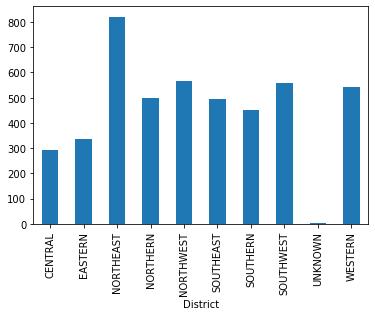

In [45]:
bc2_auto_theft.groupby('District')['District'].count().plot.bar()

In [50]:
autotheft_by_dist = ddd[ddd.District != 'UNKNOWN']
autotheft_by_dist.head(9)

,District,autotheft
0,CENTRAL,294
1,EASTERN,336
2,NORTHEAST,821
3,NORTHERN,498
4,NORTHWEST,567
5,SOUTHEAST,494
6,SOUTHERN,453
7,SOUTHWEST,557
9,WESTERN,542


filter only 2015 in df table

In [61]:
df2['DateTime'] = pd.to_datetime(df2['ViolDate'])

In [62]:
df2['just_date'] = df2['DateTime'].dt.date

In [67]:
df2['just_date2'] = pd.to_datetime(df2['just_date'])
df2.just_date2.dtype

dtype('<M8[ns]')

In [68]:
df2_2015 = df2[(df2['just_date2'] > '2014-12-31') & (df2['just_date2'] < '2016-01-01')]

Now get citations for each police district in 2015

In [71]:
g = df2_2015.groupby('PoliceDistrict')['Citation'].count()
g

PoliceDistrict
CENTRAL         11852
EASTERN          3125
NORTHEASTERN     4111
NORTHERN         9586
NORTHWESTERN     1731
SOUTHEASTERN    14981
SOUTHERN        12422
SOUTHWESTERN     2610
WESTERN          2481
Name: Citation, dtype: int64

In [75]:
citation_by_district_2015 = pd.DataFrame({'District': g.index, 'Citation':g.values})

In [76]:
citation_by_district_2015

,District,Citation
0,CENTRAL,11852
1,EASTERN,3125
2,NORTHEASTERN,4111
3,NORTHERN,9586
4,NORTHWESTERN,1731
5,SOUTHEASTERN,14981
6,SOUTHERN,12422
7,SOUTHWESTERN,2610
8,WESTERN,2481


In [81]:
citation_by_district_2015.replace(['NORTHWESTERN'], 'NORTHWEST', inplace = True)
citation_by_district_2015.replace(['NORTHEASTERN'], 'NORTHEAST', inplace = True)
citation_by_district_2015.replace(['SOUTHWESTERN'], 'SOUTHWEST', inplace = True)
citation_by_district_2015.replace(['SOUTHEASTERN'], 'SOUTHEAST', inplace = True)

In [82]:
autotheft_citations_2015 = autotheft_by_dist.merge(citation_by_district_2015, left_on = 'District', right_on = 'District', how = 'inner')

In [83]:
autotheft_citations_2015

,District,autotheft,Citation
0,CENTRAL,294,11852
1,EASTERN,336,3125
2,NORTHEAST,821,4111
3,NORTHERN,498,9586
4,NORTHWEST,567,1731
5,SOUTHEAST,494,14981
6,SOUTHERN,453,12422
7,SOUTHWEST,557,2610
8,WESTERN,542,2481


Finally, determine the ratio of auto thefts to parking citations for each district.

In [84]:
autotheft_citations_2015['ratio of autotheft to citations'] = autotheft_citations_2015.autotheft / autotheft_citations_2015.Citation

In [87]:
autotheft_citations_2015

,District,autotheft,Citation,ratio of autotheft to citations
0,CENTRAL,294,11852,0.024806
1,EASTERN,336,3125,0.107520
2,NORTHEAST,821,4111,0.199708
3,NORTHERN,498,9586,0.051951
4,NORTHWEST,567,1731,0.327556
5,SOUTHEAST,494,14981,0.032975
6,SOUTHERN,453,12422,0.036468
7,SOUTHWEST,557,2610,0.213410
8,WESTERN,542,2481,0.218460


In [89]:
autotheft_citations_2015['ratio of autotheft to citations'].max()

0.3275563258232236

First, find the total number of citations given in each year between 2004 and 2014 (inclusive). Next, using linear regression, create a function that plots the total number of citations as a function of the year. If you were to plot a line using this function, what would be the slope of that line? 

In [90]:
import pandas as pd
df = pd.read_csv('Parking_Citations.csv')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
df.head(2)

,Citation,Tag,ExpMM,ExpYY,State,Make,Address,ViolCode,Description,ViolFine,...,Balance,PenaltyDate,OpenFine,OpenPenalty,NoticeDate,ImportDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,82691651,69943CF,04,19.0,MD,MAZD,1300 BLK EAST NORTHERN PKWY WB,32,Fixed Speed Camera,40.0,...,0.0,NaN,0.0,0.0,NaN,04/26/2018 04:02:00 AM,NaN,NaN,NaN,"1300 BLK EAST NORTHERN PKWY\nWB Baltimore, MD\..."
1,85937226,T720887,12,18.0,MD,ACUR,300 BLK NORTH BEND RD SB,32,Fixed Speed Camera,40.0,...,40.0,NaN,0.0,0.0,NaN,01/03/2019 04:33:00 AM,NaN,NaN,NaN,NaN


filter by year

In [93]:
df['DateTime'] = pd.to_datetime(df['ViolDate'])

In [94]:
df['Year'] = pd.DatetimeIndex(df['DateTime']).year  

In [95]:
df3 = df.groupby('Year')['Citation'].count()

In [97]:
df3_frame = pd.DataFrame({'Year':df3.index, 'citation':df3.values})
df3_frame

,Year,citation
0,1999.0,1
1,2000.0,3
2,2002.0,58
3,2003.0,148
4,2004.0,162
5,2005.0,1136
6,2006.0,5550
7,2007.0,50049
8,2008.0,41672
9,2009.0,42719


In [98]:
condi = (df3_frame.Year >= 2004.0) & (df3_frame.Year <= 2014.0)

In [99]:
df3_frame_2004_2014 = df3_frame[condi]

In [100]:
df3_frame_2004_2014

,Year,citation
4,2004.0,162
5,2005.0,1136
6,2006.0,5550
7,2007.0,50049
8,2008.0,41672
9,2009.0,42719
10,2010.0,45842
11,2011.0,129722
12,2012.0,160453
13,2013.0,53916


In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [133]:
def plot_lr(x,y):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x, y)
    model = LinearRegression().fit(x, y)
    b_0 =  model.intercept_
    b_1 = model.coef_
    plt.scatter(x,y, color = "m",marker = "o", s = 30)
    y_pred = b_0 + b_1*x
    plt.plot(x,y_pred,color = "g")
    plt.xlabel('Year')
    plt.ylabel('citation')
    plt.show()    
    return(b_0, b_1)

In [136]:
x = df3_frame_2004_2014.Year.values
y = df3_frame_2004_2014.citation.values
x = x.astype('int')
print(x.dtype, y.dtype)

int64 int64


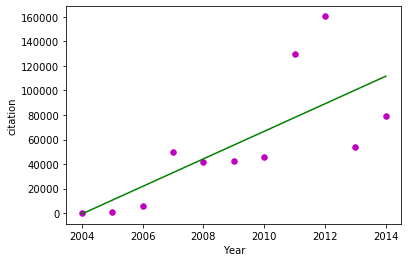

(-22485675.72727273, array([11220.09090909]))

In [137]:
xx = x.reshape((-1, 1))
yy = y
plot_lr(xx,yy)